# Los Angeles Metro Bike Share
## Афанасьев Павел

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(X):
    c = X[['Start Time','Duration']]
    c = c.set_index('Start Time')
    c = c.resample('60T').count()
    c['hour'] = pd.Series(c.index).dt.hour.values
    c['minute'] = pd.Series(c.index).dt.minute.values
    c = c.groupby(['hour','minute']).mean()
    c = c.rename(index=str, columns={"Duration": "count"})
    return c
def func2(X):
    c = X[['Start Time','Duration']]
    c = c.set_index('Start Time')
    c = c.resample('D').count()
    return c

In [3]:
X = pd.read_csv('metro-bike-share-trip-data.csv',low_memory=False)
X['Start Time'] = pd.to_datetime(X['Start Time'])
X['End Time'] = pd.to_datetime(X['End Time'])
X = X.iloc[pd.isna(X['Bike ID']).values==False]# удаляем там где Bike id = null
X.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07 04:17:00,2016-07-07 04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07 06:00:00,2016-07-07 06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07 10:32:00,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07 10:37:00,2016-07-07 13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07 12:51:00,2016-07-07 12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


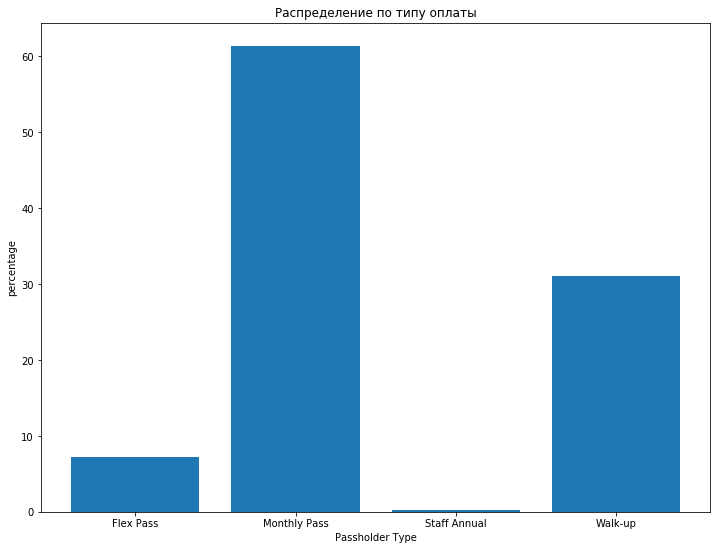

In [60]:
a = X.groupby(['Passholder Type'])['Trip ID'].count()
b = X.groupby(['Passholder Type'])['Trip ID'].count().sum()
c = (a/b*100)
plt.figure(figsize=(12,9))
plt.bar(c.index,c.values)
plt.title('Распределение по типу оплаты')
plt.xlabel('Passholder Type')
plt.ylabel('percentage')
plt.show()

Как видно из графика, абонемент на месяц является наиболее популярным типом, далее идет разовый абонемент.

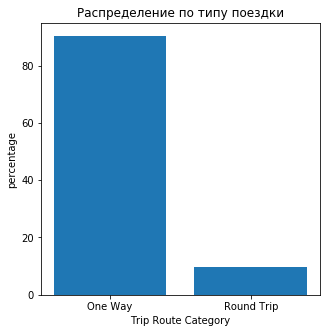

In [61]:
a = X.groupby(['Trip Route Category'])['Trip ID'].count()
b = X.groupby(['Trip Route Category'])['Trip ID'].count().sum()
t = a/b*100
plt.figure(figsize=(5,5))
plt.title('Распределение по типу поездки')
plt.bar(t.index,t.values)
plt.xlabel('Trip Route Category')
plt.ylabel('percentage')
plt.show()

Из графика видно, что большую массу составляют поездки, у которых начальная станция отличается от конечной :) 

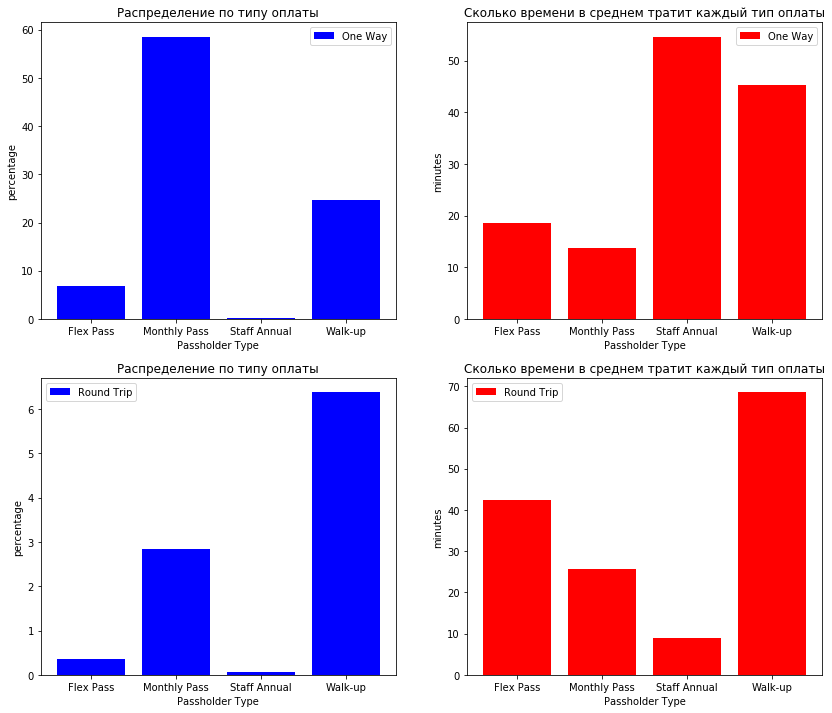

In [62]:
a = X.groupby(['Trip Route Category','Passholder Type'])['Trip ID'].count()
b = X.groupby(['Trip Route Category','Passholder Type'])['Trip ID'].count().sum()
d = (a/b*100)
lev1 = d.index.levels[1]
vals = d.values
r = X.groupby(['Trip Route Category','Passholder Type'])['Duration'].mean()/(60)
vals2 = r.values
ylabel = {0:'percentage',1:'minutes'}
#lev1 = np.roll(lev1,1)
titles = {0:'Распределение по типу оплаты', 1: 'Сколько времени в среднем тратит каждый тип оплаты'}
labels, colors = {0:'One Way', 1:'Round Trip'}, {0:'b',1:'r',2:'b',3:'r'}
full_vals = np.vstack((vals,vals2))
fig, axes= plt.subplots(nrows=2, ncols=2,figsize=(14, 12))
for k in range(len(fig.axes)):
    if (labels[k//2]=='One Way'):
        fig.axes[k].bar(lev1,full_vals[k%2,:4],color=colors[k],label=labels[k//2])
    else:
        fig.axes[k].bar(lev1,full_vals[k%2,4:],color=colors[k],label=labels[k//2])
    fig.axes[k].set_title(titles[k%2])
    fig.axes[k].set_xlabel('Passholder Type')
    fig.axes[k].set_ylabel(ylabel[k%2])
    fig.axes[k].legend()

plt.show()

В этой совокупности графиков "нетрудно" заметить следующие удивительные вещи:
* Люди, берущие разовый абонемент, катаются на велосипеде в среднем дольше остальных
* Люди, берущие разовый абонемент, любят кататься по кругу чаще тех, кто платит раз в месяц
* Реже всех берут велосипеды персонал, но при этом имеют самое большое среднее время катания, если ехать из точки А в точку Б.

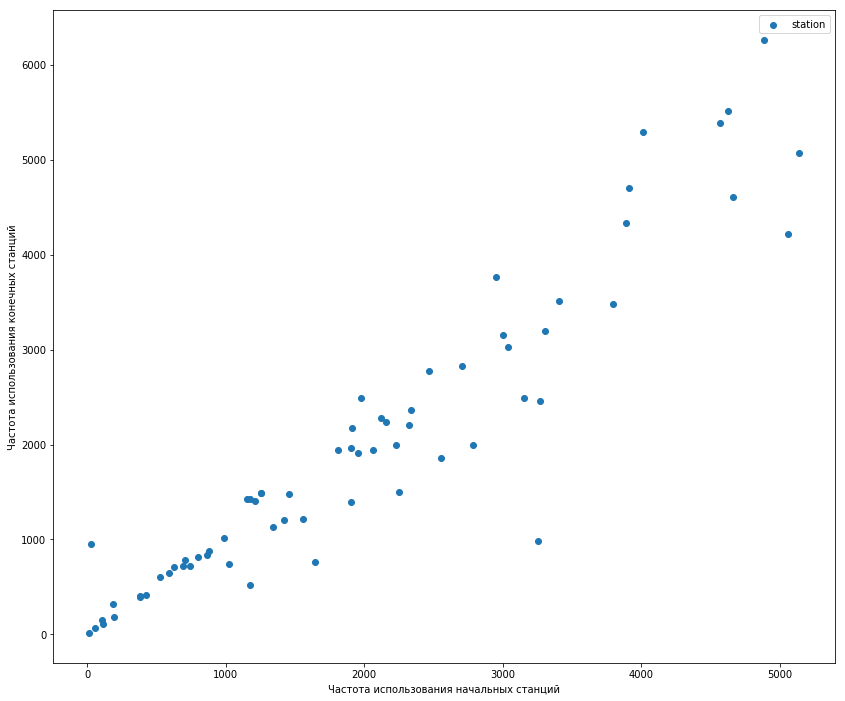

In [81]:
start_station = X["Starting Station ID"].value_counts()
end_station = X["Ending Station ID"].value_counts()
stations = pd.concat((start_station, end_station), axis=1)
plt.figure(figsize=(14,12))
plt.scatter((stations['Starting Station ID']),stations['Ending Station ID'],label='station')
plt.xlabel('Частота использования начальных станций')
plt.ylabel('Частота использования конечных станций')
plt.legend()
plt.show()

Частота использования некоторой станции, как начальной, сильно скоррелирована с частотой использования этой же станции, как конечной. То есть, сколько велосипедов приезжают на станцию, столько и уезжают.

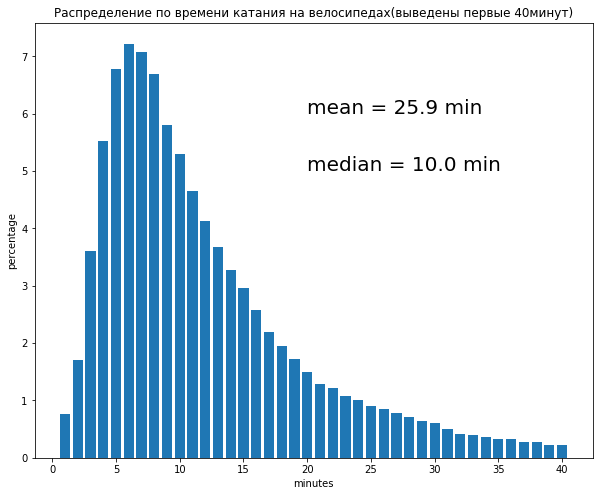

In [64]:
t = X.Duration.value_counts()
med = X.Duration.median()/60
mean = X.Duration.mean()/60
t.index = t.index/60
vals = t.values/t.sum()*100
k=40
fig = plt.figure(figsize=(10,8))
plt.bar((t.index)[:k],vals[:k])
plt.title('Распределение по времени катания на велосипедах(выведены первые 40минут)')
plt.text(20,6,'mean = %.1f min'%mean,fontsize=20)
plt.text(20,5,'median = %.1f min'%med,fontsize=20)
plt.xlabel('minutes')
plt.ylabel('percentage')
plt.show()

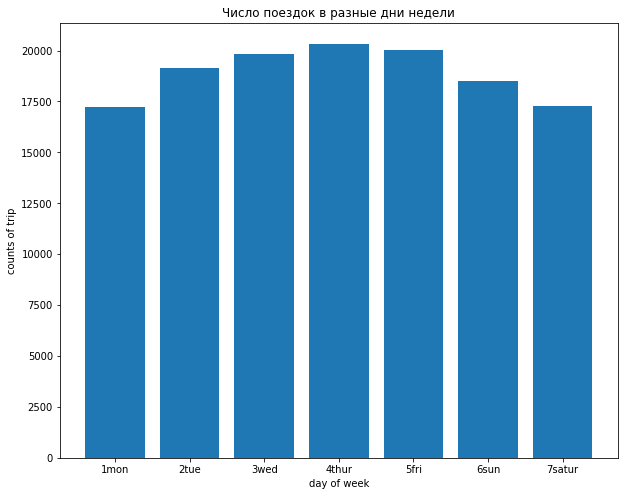

In [65]:
c = X[['Start Time','Duration']]
c = c.set_index('Start Time')
c = c.resample('D').count()
mas = np.zeros(7)
for i in range(7):
    mas[i] = c[c.index.dayofweek==i].Duration.sum()
plt.figure(figsize=(10,8))
y = ['1mon','2tue','3wed','4thur','5fri','6sun','7satur']
plt.bar(y,mas)
plt.xlabel('day of week')
plt.title('Число поездок в разные дни недели')
plt.ylabel('counts of trip')
plt.show()

Как видно из гистограммы, четверг самый популярный день для езды на велосипеде... 

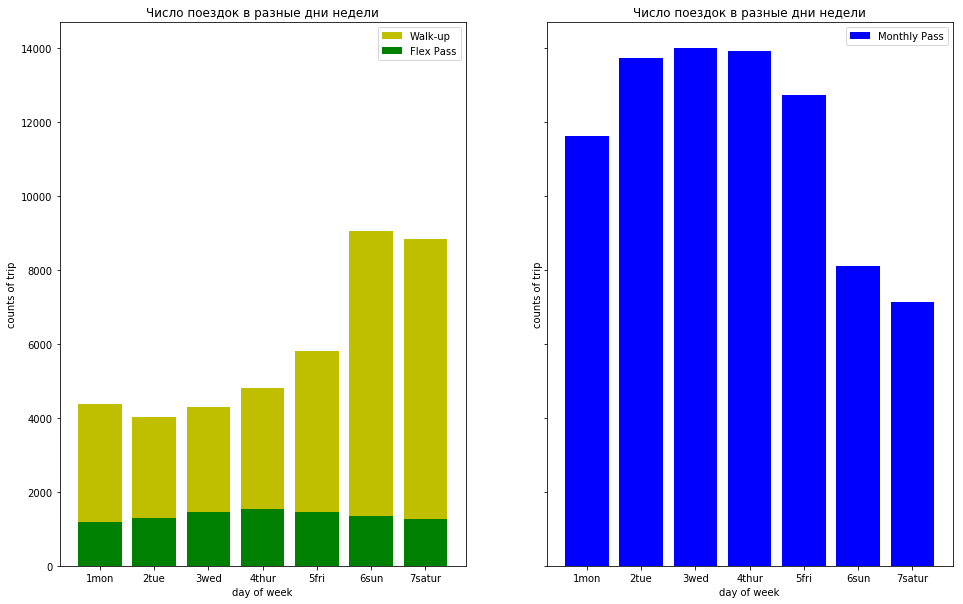

In [66]:
colors = {'Monthly Pass':'b','Flex Pass':'g','Walk-up':'y'}
r=3
plt.figure(figsize=(10,8))
j=0
fig, axes= plt.subplots(nrows=1, ncols=2,figsize=(16, 10),sharey=True)
for k in ['Walk-up','Monthly Pass','Flex Pass']:
    if(k=='Monthly Pass'):
        r=4.5
    c = X[X['Passholder Type']==k]
    c = c[['Start Time','Duration']]
    c = c.set_index('Start Time')
    c = c.resample('D').count()
    mas = np.zeros(7)
    for i in range(7):
        mas[i] = c[c.index.dayofweek==i].Duration.sum()
    y = ['1mon','2tue','3wed','4thur','5fri','6sun','7satur']
    fig.axes[j%2].bar(y,mas,color=colors[k],label=k)
    fig.axes[j%2].set_xlabel('day of week')
    #plt.text(r,mas.mean(),k,fontsize=30)
    fig.axes[j%2].set_title('Число поездок в разные дни недели')
    fig.axes[j%2].set_ylabel('counts of trip')
    fig.axes[j%2].legend()
    j+=1
plt.show()

То есть, люди, покупающие разовый абонемент, любят кататься по выходным, в то время как те, кто платят раз в месяц, чаще ездят в будние дни, скорее всего это работяги. Гистограмма поездок велосипедистов, кто имеют годовой абонемент, распределена как среднее, можно предположить, что они и работяги и по выходным любят кататься(активный отдых).

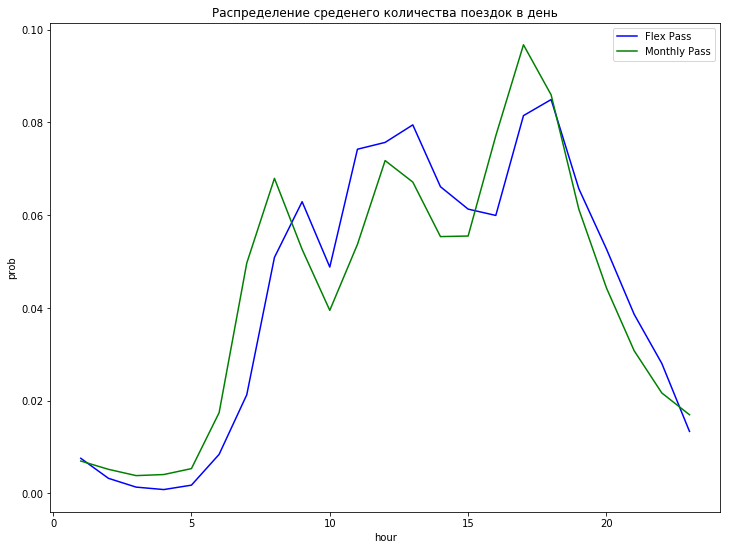

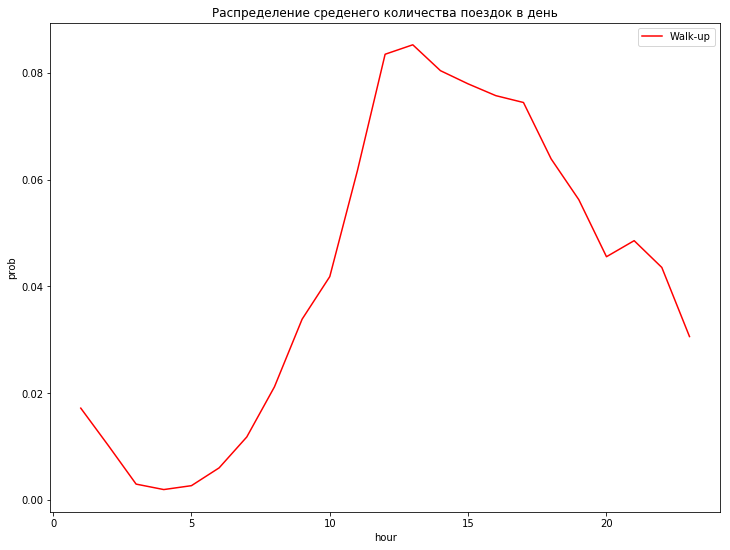

In [72]:
colors = {'Flex Pass':'b','Monthly Pass':'g','Walk-up':'r'}
types = ['Flex Pass','Monthly Pass','Walk-up']
#labels = 
fig = plt.figure(figsize=(12,9))
for k in types[:2]: 
    res= func(X[X['Passholder Type']==k])
    res=res/res.sum()
    plt.plot(np.linspace(0,23,res.shape[0])[1:],res.values[1:],label=k,color=colors[k])
plt.xlabel('hour')
plt.ylabel('prob')
plt.title('Распределение среденего количества поездок в день')
plt.legend()
fig = plt.figure(figsize=(12,9))
for k in types[2:]: 
    res = func(X[X['Passholder Type']==k])
    res=res/res.sum()
    plt.plot(np.linspace(0,23,res.shape[0])[1:],res.values[1:],label=k,color=colors[k])
plt.xlabel('hour')
plt.ylabel('prob')
plt.title('Распределение среденего количества поездок в день')
plt.legend()
plt.show()

На первом графике мы имеем три пика. Значит, обладатели годового и месячного абонемента ездят в 7-8 утра(на работу), затем в 12 дня (наверное, на обед), и в 18 вечера(с работы). На втором графике мы имеем один пик, что подтверждает поездки в выходные дни.

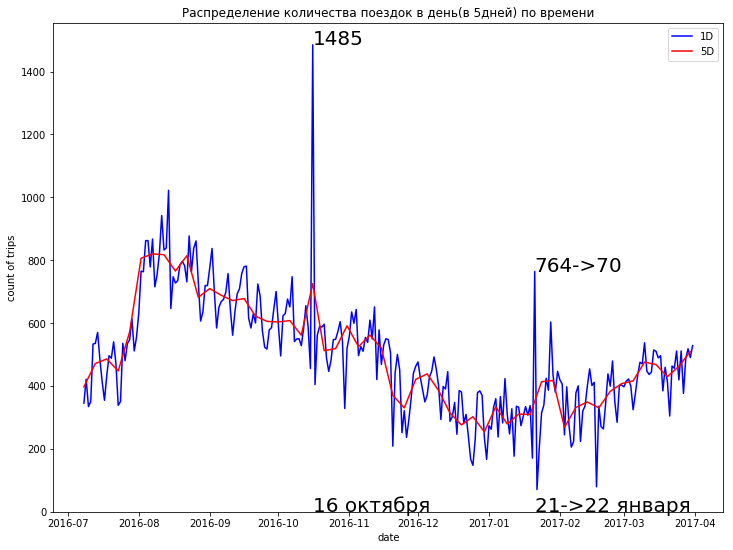

In [73]:
res = func2(X)[1:]
m = res.idxmax()
m2 = res[130:].idxmax()
mn = res.idxmin()
fit = plt.figure(figsize=(12,9))
ind = res.index
plt.plot(ind,res.values,label = '1D',color='b')
#plt.plot(np.array([m.values[0],m.values[0]]),[0,res.max()],color='g')

plt.text(m.values[0],0,'16 октября',fontsize=20)
plt.text(m.values[0],res.max(),'%.i'%res.max(),fontsize=20)
plt.text(m2.values[0],0,'21->22 января',fontsize=20)
plt.text(m2.values[0],res[130:].max(),'%.i'%res[130:].max()+'->'+'%.i'%res.min(),fontsize=20)
#plt.text(mn.values[0],0,'5 октября',fontsize=20)

res2 = res.resample('5D').mean()
ind2 = res2.index
plt.ylabel('count of trips')
plt.xlabel('date')
plt.title('Распределение количества поездок в день(в 5дней) по времени')
plt.plot(ind2,res2.values,color='r',label='5D')
plt.legend()
plt.show()

Все нормально, но за что провал в середине лета, и что за дни такие: 16 октября и 21 января?

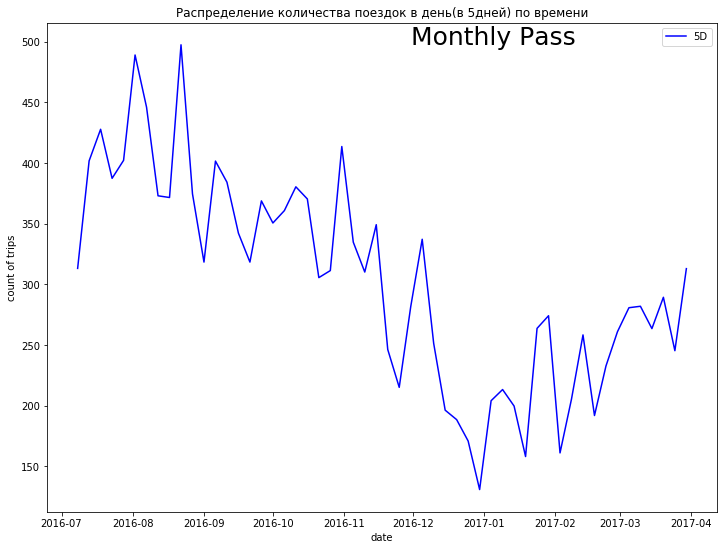

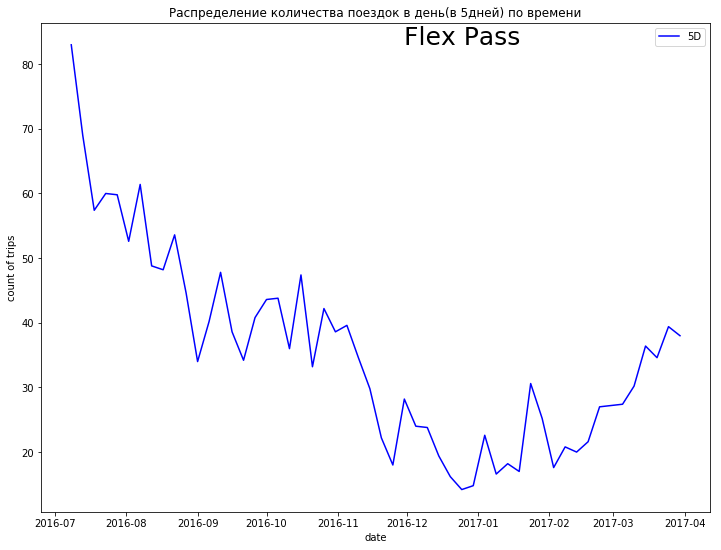

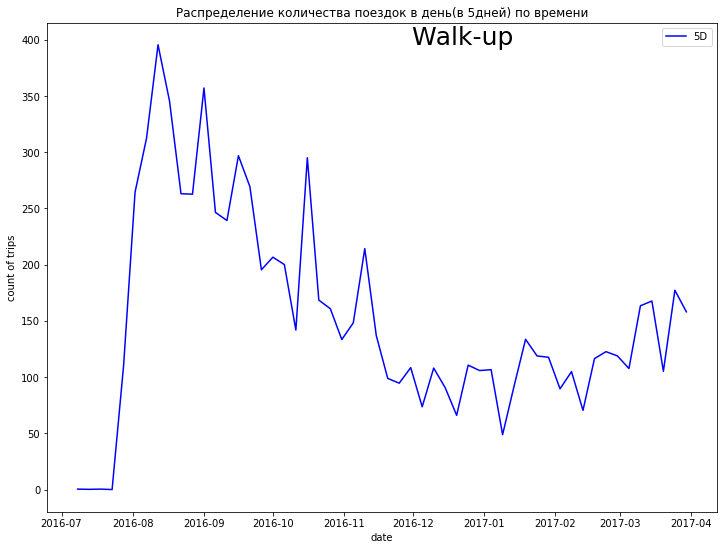

In [6]:
colors = {'Monthly Pass':'b','Flex Pass':'g','Walk-up':'y'}
for k in ['Monthly Pass','Flex Pass','Walk-up']:
    res = func2(X[X['Passholder Type']==k])[1:]
    m = res.idxmax()
    m2 = res[130:].idxmax()
    mn = res.idxmin()
    fit = plt.figure(figsize=(12,9))
    ind = res.index
    #plt.plot(ind,res.values,label = '1D')
    res2 = res.resample('5D').mean()
    ind2 = res2.index
    plt.ylabel('count of trips')
    plt.xlabel('date')
    plt.title('Распределение количества поездок в день(в 5дней) по времени')
    plt.plot(ind2,res2.values,color='b',label='5D')
    plt.text('2016-11-30',res2.max()[0],k,fontsize=25)
    plt.legend()
plt.show()

Странный июль...

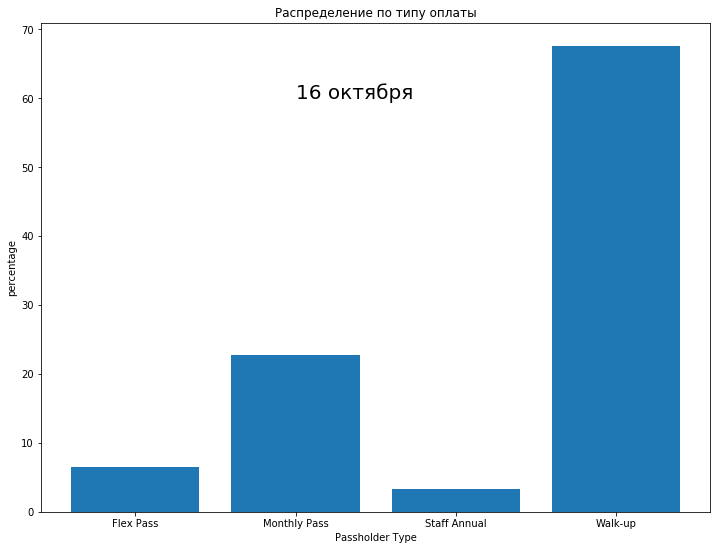

In [10]:
b = X['Start Time']
c = b.reset_index()
c = c.set_index('Start Time')
ind = c['2016-10-16'].values
X16 = X.loc[ind.reshape(-1)]
a = X16.groupby(['Passholder Type'])['Trip ID'].count()
b = X16.groupby(['Passholder Type'])['Trip ID'].count().sum()
c = (a/b*100)
plt.figure(figsize=(12,9))
plt.bar(c.index,c.values)
plt.text(1,60,'16 октября',fontsize=20)
plt.title('Распределение по типу оплаты')
plt.xlabel('Passholder Type')
plt.ylabel('percentage')
plt.show()

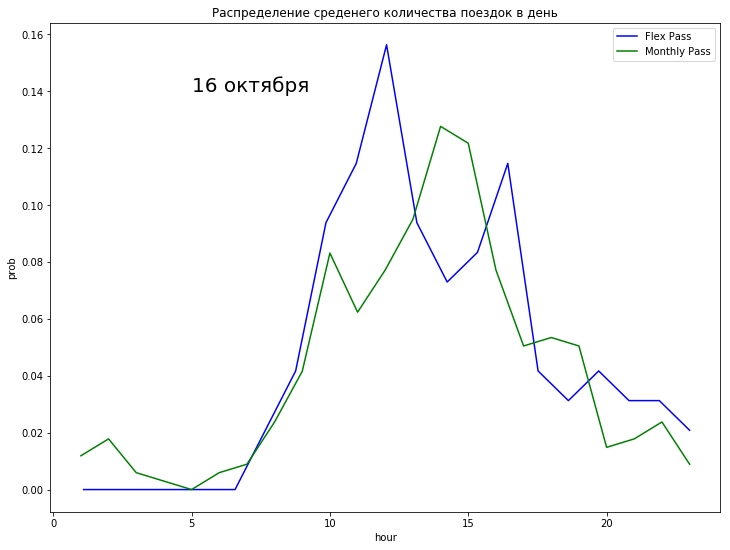

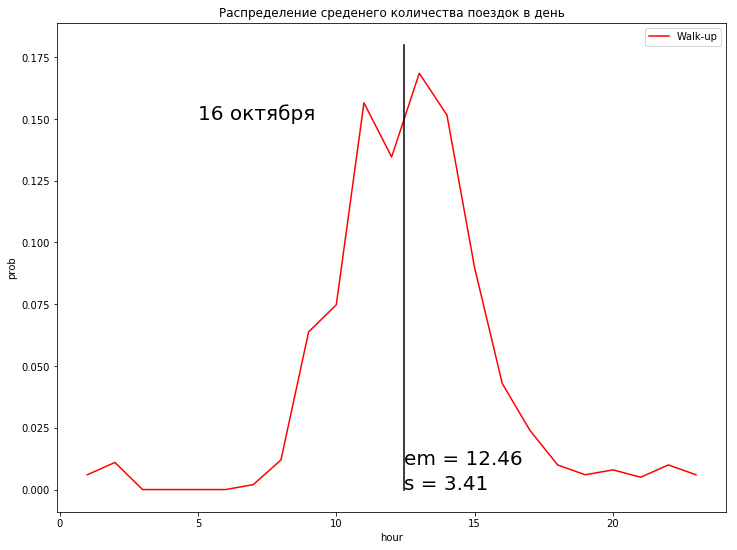

In [9]:
colors = {'Flex Pass':'b','Monthly Pass':'g','Walk-up':'r'}
types = ['Flex Pass','Monthly Pass','Walk-up']
#labels = 
fig = plt.figure(figsize=(12,9))
for k in types[:2]: 
    res = func(X16[X16['Passholder Type']==k])
    res=res/res.sum()
    plt.plot(np.linspace(0,23,res.shape[0])[1:],res.values[1:],label=k,color=colors[k])
plt.xlabel('hour')
plt.ylabel('prob')
plt.text(5,0.14,'16 октября',fontsize=20)
plt.title('Распределение среденего количества поездок в день')
plt.legend()
fig = plt.figure(figsize=(12,9))
for k in types[2:]: 
    res = func(X16[X16['Passholder Type']==k])
    res=res/res.sum()

    plt.plot(np.linspace(0,23,res.shape[0])[1:],res.values[1:],label=k,color=colors[k])
plt.xlabel('hour')
plt.ylabel('prob')
plt.text(5,0.15,'16 октября',fontsize=20)

x = res.reset_index()['hour']
x = np.array([int(i) for i in x.values])
y = res['count'].values
em = np.sum(x*y)
s = np.sqrt((np.sum(x**2 *y) - (em)**2))

plt.plot([em,em],[0,0.18],'black')
plt.text(em,0.01,'em = %.2f'%em,fontsize=20)
plt.text(em,0,'s = %.2f'%s,fontsize=20)

plt.title('Распределение среденего количества поездок в день')
plt.legend()
plt.show()